In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='InvertedPendulum-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(249338, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(248743, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,02-08-2023 20:54:44,16,0,16,0.000795,1,17,True,16,16.0,16.0,16.0,16.0,COMPER
1,1,2,InvertedPendulum-v4,02-08-2023 20:54:44,17,0,17,0.000845,1,18,True,17,16.5,16.5,16.5,16.5,COMPER
2,1,3,InvertedPendulum-v4,02-08-2023 20:54:45,18,0,18,0.000895,1,19,True,18,17.0,17.0,17.0,17.0,COMPER
3,1,4,InvertedPendulum-v4,02-08-2023 20:54:46,19,0,19,0.000944,1,20,True,19,17.5,17.5,17.5,17.5,COMPER
4,1,5,InvertedPendulum-v4,02-08-2023 20:54:47,20,0,20,0.000994,1,21,True,20,18.0,18.0,18.0,18.0,COMPER
5,1,6,InvertedPendulum-v4,02-08-2023 20:54:48,21,0,21,0.001044,1,22,True,21,18.5,18.5,18.5,18.5,COMPER
6,1,7,InvertedPendulum-v4,02-08-2023 20:54:48,22,0,22,0.001093,1,23,True,22,19.0,19.0,19.0,19.0,COMPER
7,1,8,InvertedPendulum-v4,02-08-2023 20:54:49,23,0,23,0.001143,1,24,True,23,19.5,19.5,19.5,19.5,COMPER
8,1,9,InvertedPendulum-v4,02-08-2023 20:54:50,24,0,24,0.001193,1,25,True,24,20.0,20.0,20.0,20.0,COMPER
9,1,10,InvertedPendulum-v4,02-08-2023 20:54:51,25,0,25,0.001243,1,26,True,25,20.5,20.5,20.5,20.5,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,21-07-2023 11:57:31,22,23,0,0.001093,1,23,True,22,22.0,22.0,22.0,22.0,DDPG
1,1,2,InvertedPendulum-v4,21-07-2023 11:57:31,23,24,0,0.001143,1,24,True,23,22.5,22.5,22.5,22.5,DDPG
2,1,3,InvertedPendulum-v4,21-07-2023 11:57:31,24,25,0,0.001193,1,25,True,24,23.0,23.0,23.0,23.0,DDPG
3,1,4,InvertedPendulum-v4,21-07-2023 11:57:32,25,26,0,0.001243,1,26,True,25,23.5,23.5,23.5,23.5,DDPG
4,1,5,InvertedPendulum-v4,21-07-2023 11:57:32,26,27,0,0.001292,1,27,True,26,24.0,24.0,24.0,24.0,DDPG
5,1,6,InvertedPendulum-v4,21-07-2023 11:57:32,27,28,0,0.001342,1,28,True,27,24.5,24.5,24.5,24.5,DDPG
6,1,7,InvertedPendulum-v4,21-07-2023 11:57:32,28,29,0,0.001392,1,29,True,28,25.0,25.0,25.0,25.0,DDPG
7,1,8,InvertedPendulum-v4,21-07-2023 11:57:32,29,30,0,0.001441,1,30,True,29,25.5,25.5,25.5,25.5,DDPG
8,1,9,InvertedPendulum-v4,21-07-2023 11:57:32,30,31,0,0.001491,1,31,True,30,26.0,26.0,26.0,26.0,DDPG
9,1,10,InvertedPendulum-v4,21-07-2023 11:57:32,31,32,0,0.001541,1,32,True,31,26.5,26.5,26.5,26.5,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,02-08-2023 20:54:44,16,0,16,0.000795,1,17,True,16,16.0,16.0,16.0,16.0,COMPER
1,1,2,InvertedPendulum-v4,02-08-2023 20:54:44,17,0,17,0.000845,1,18,True,17,16.5,16.5,16.5,16.5,COMPER
2,1,3,InvertedPendulum-v4,02-08-2023 20:54:45,18,0,18,0.000895,1,19,True,18,17.0,17.0,17.0,17.0,COMPER
3,1,4,InvertedPendulum-v4,02-08-2023 20:54:46,19,0,19,0.000944,1,20,True,19,17.5,17.5,17.5,17.5,COMPER
4,1,5,InvertedPendulum-v4,02-08-2023 20:54:47,20,0,20,0.000994,1,21,True,20,18.0,18.0,18.0,18.0,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
49463,5,49464,InvertedPendulum-v4,21-07-2023 18:33:28,49997,7835,0,0.999,50,998,True,997,505.686014,947.5,972.5,992.5,DDPG
49464,5,49465,InvertedPendulum-v4,21-07-2023 18:33:28,49998,7835,0,0.999,50,999,True,998,505.695967,948.5,973.5,993.5,DDPG
49465,5,49466,InvertedPendulum-v4,21-07-2023 18:33:28,49999,7835,0,0.999,50,1000,True,999,505.705939,949.5,974.5,994.5,DDPG
49466,5,49467,InvertedPendulum-v4,21-07-2023 18:33:28,50000,7835,0,0.999,50,1001,True,1000,505.715932,950.5,975.5,995.5,DDPG
49467,5,49468,InvertedPendulum-v4,21-07-2023 18:33:29,50001,7836,0,0.999,51,2,True,1,505.705729,941.5,956.5,896.5,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

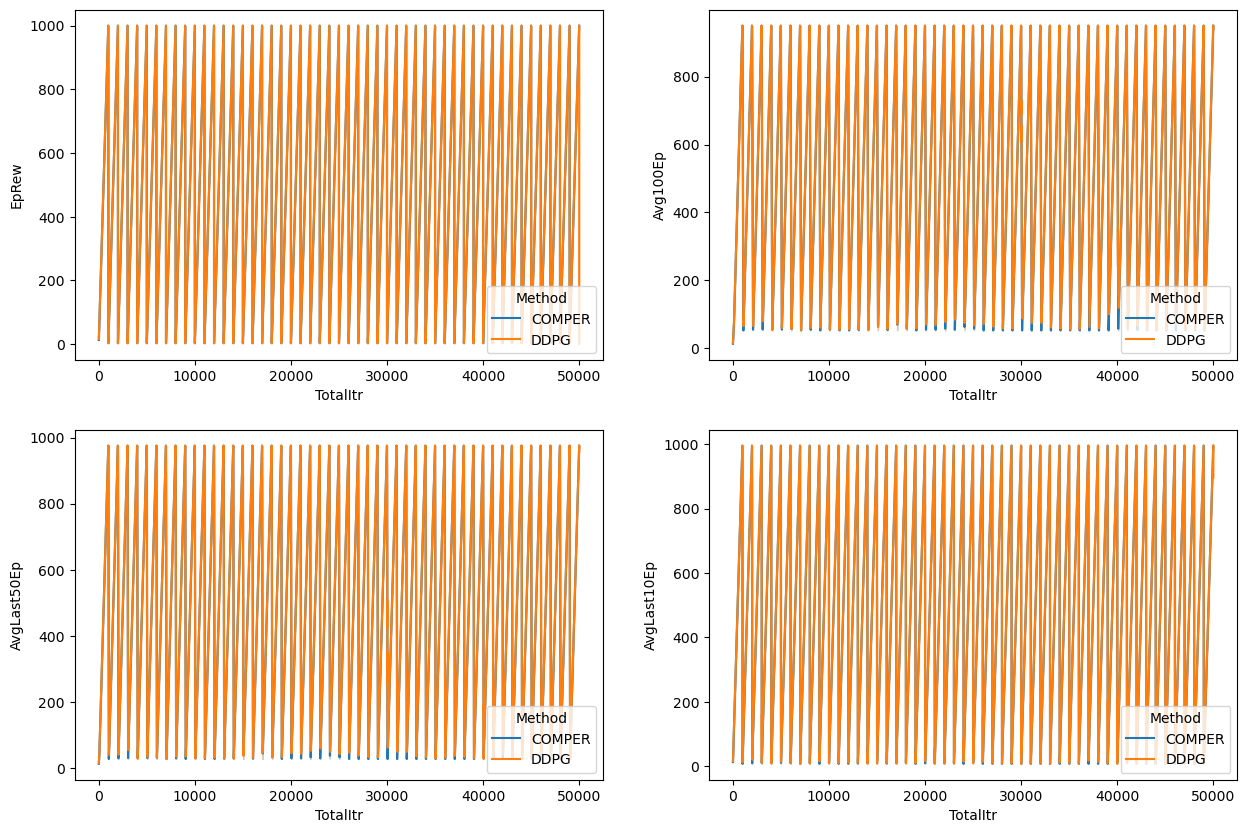

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

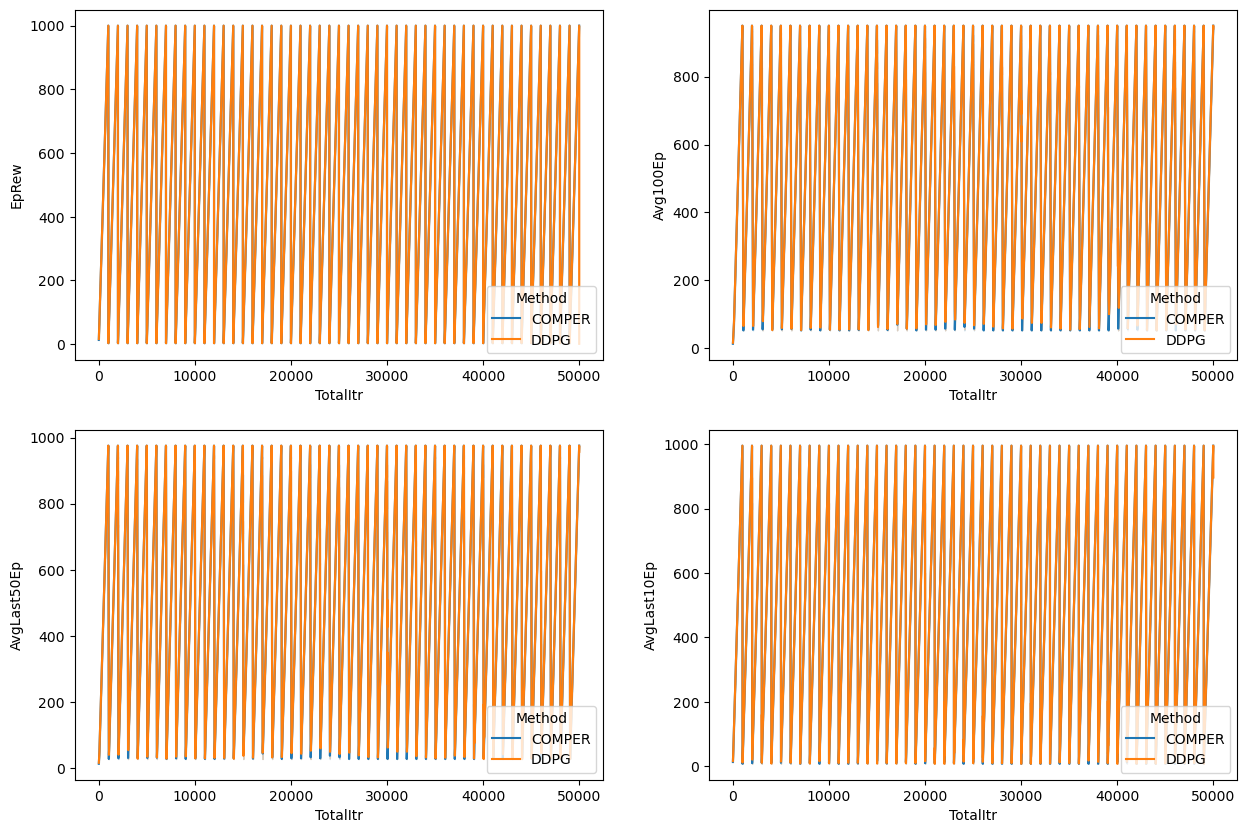

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [12]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,2,31-07-2023 19:43:25,InvertedPendulum-v4,5000,2.0,COMPER
1,2,31-07-2023 22:01:02,InvertedPendulum-v4,10000,2.0,COMPER
2,2,01-08-2023 00:21:06,InvertedPendulum-v4,15000,2.0,COMPER
3,2,01-08-2023 02:40:53,InvertedPendulum-v4,20000,2.0,COMPER
4,2,01-08-2023 05:00:46,InvertedPendulum-v4,25000,2.0,COMPER


In [13]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.160000
std,1.428571,14507.211437,0.478518
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.000000
max,5.000000,50000.000000,4.500000


In [14]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,21-07-2023 12:05:06,InvertedPendulum-v4,5000,2.0,DDPG
1,1,21-07-2023 12:12:41,InvertedPendulum-v4,10000,2.0,DDPG
2,1,21-07-2023 12:20:23,InvertedPendulum-v4,15000,3.0,DDPG
3,1,21-07-2023 12:28:14,InvertedPendulum-v4,20000,2.0,DDPG
4,1,21-07-2023 12:36:18,InvertedPendulum-v4,25000,3.0,DDPG


In [15]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.450000
std,1.428571,14507.211437,0.980681
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.375000
max,5.000000,50000.000000,5.500000


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

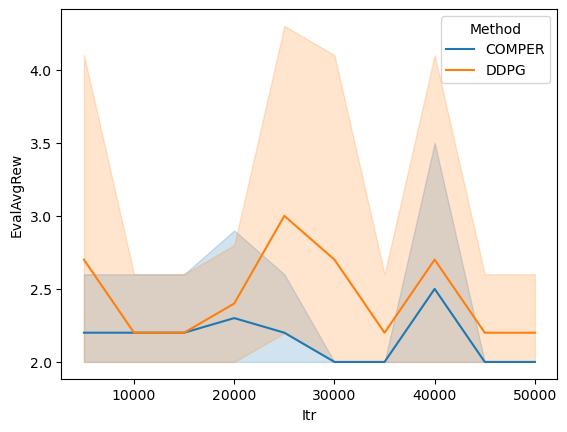

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')